# NYC Parking Violation Data FY 2024


Fall 2023 Python Capstone Project

Professor Imran Khan

Elissa Selmore


### Introduction




In searching for a dataset for the final capstone project, I stumbled across the NYC Parking Violations Data. While this data is not pertinent to my career, I believe this information is relevant to city residents, and it sparked my interest, so I wanted to do some digging.




The New York City Department of Finance, like many other jurisdictions, utilizes traffic enforcement as a parking management and revenue generation tool. The revenue produced from this source funds a variety of city provided services. Since 2012 the city of New York has seen an increase in parking violation revenue by 10.3% and that number continues to climb. This surge in issued parking violation tickets has resulted in millions for the city year after year. In 2015, The New York Daily News reported that 445,000 speed cameras violations were issued compared to the nearly 118,000 issued manually over the same period. In FY2023, New York issued 9,832,843 parking violations. Seven months into FY2024 New York City is expected to exceed that number because of the automated enforcement program.




This dataset is public and can be found on the NYC Open Data website, on the city government page under Department of Finance. The dataset contains over 7 million rows signifying issued violations, and 43 columns signifying a field on the parking violation ticket. The dataset was created to track parking violations in New York City’s boroughs: Manhattan, Brooklyn, Bronx, Queens, and Staten Island. This data is continuously collected during the fiscal year (FY) by the Department of Finance and is updated monthly.




#### Research Questions




    1.	Which borough issued the most parking violation tickets in FY2024?
    2.	What are the 5 states (license plate) with the most parking violations in FY2024?
    3.	What is the most common vehicle type to receive a parking violation ticket?
    4.	What is the most ticketed violation description code?
    5.	What month(s) have the highest violation numbers?
    6.	What location in the city is a driver most likely to be ticketed and why?




#### Method




To understand the information, it will be crucial to apply several cleaning methods to this data frame. When applied the isnull function and heatmap can provide insight on what columns are missing information; the columns with large amounts of missing information can be dropped using the dropna function; and the groupby and dictionary functions will also be useful for analysis by splitting the object and coming the new results. For visual analysis the data will be formatted into various bar, pie, and sns plots.

In [1]:
import pandas as pd

df=pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2024_20240106.csv')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import matplotlib as mpl

import seaborn as sns

import matplotlib.cm as cm
import matplotlib.colors as colors

from PIL import Image, ImageDraw


from IPython.core.display import HTML
import sys

C:\Users\eliss\AppData\Local\Temp\ipykernel_26892\654565375.py:3: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2024_20240106.csv')


##### Review of Imported Data

In [2]:
#Fist 5 rows of data information

df.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1159637337,KZH2758,NY,PAS,06/09/2023,67,VAN,HONDA,P,0,...,BLUE,0.0,2006,-,0,NaN,NaN,NaN,NaN,NaN
1,1252960645,JPD8746,NY,PAS,06/30/2023,87,SUBN,LINCO,M,17870,...,GRAY,0.0,2020,-,0,NaN,NaN,NaN,NaN,NaN
2,1252960669,JPD8746,NY,PAS,06/30/2023,31,SUBN,LINCO,M,17870,...,GRAY,0.0,2020,-,0,NaN,NaN,NaN,NaN,NaN
3,1252994126,MBH9245,99,PAS,07/06/2023,20,SDN,KIA,M,12690,...,WHITE,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
4,1252994175,MBH9245,PA,PAS,07/08/2023,40,SDN,KIA,M,12690,...,WHITE,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN


In [3]:
#Size of dataset - Extremely Large

df.shape

(7008537, 43)

In [4]:
#Neat version of column names

df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [5]:
#Reviewing column infomration to determine which can be removed

df.isnull().sum()

Summons Number                             0
Plate ID                                 116
Registration State                         0
Plate Type                                 0
Issue Date                                 0
Violation Code                             0
Vehicle Body Type                      18329
Vehicle Make                            7812
Issuing Agency                             0
Street Code1                               0
Street Code2                               0
Street Code3                               0
Vehicle Expiration Date                    0
Violation Location                   3245869
Violation Precinct                         0
Issuer Precinct                            0
Issuer Code                                0
Issuer Command                       3242855
Issuer Squad                         3487767
Violation Time                           264
Time First Observed                  6600460
Violation County                       63247
Violation 

In [6]:
#Removing columns with irrelevant information and largest number of null values

drop_cols = [
    'Plate ID',
    'Violation Location',
    'Issuer Command',
    'Issuer Squad',
    'Time First Observed',
    'Violation In Front Of Or Opposite',
    'House Number',
    'Intersecting Street',
    'Violation Legal Code',
    'From Hours In Effect',
    'To Hours In Effect', 
    'Vehicle Color',
    'Unregistered Vehicle?',
    'Meter Number',
    'Violation Post Code',
    'No Standing or Stopping Violation',
    'Hydrant Violation',
    'Double Parking Violation',
    'Date First Observed', 
    'Feet From Curb']
df.drop(drop_cols, inplace=True, axis=1)

In [7]:
#Size of dataframe with columns removed. 20 columns less than original dataframe

df.shape

(7008537, 23)

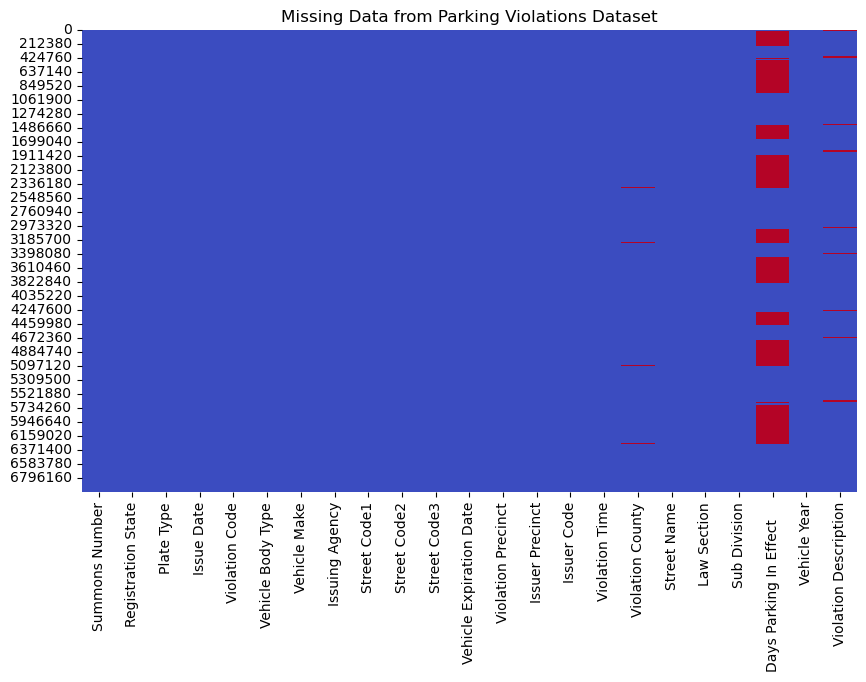

In [8]:
#Heatmap of null values in Violations dataset. Visualization of missing data
#"Days Parking in Effect" may be a column to drop

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='coolwarm', cbar=False)
plt.title('Missing Data from Parking Violations Dataset')
plt.show()

##### Initial Steps to Clean Data

In [9]:
#Used groupby function to view the number of violations by county. County = Borough
#There are a lot of inconsistencies with the naming conventions in this column

df.groupby(['Violation County'])['Violation Description'].count().sort_values(ascending=False).reset_index()

,Violation County,Violation Description
0,NY,1420263
1,QN,1267042
2,BK,939188
3,BX,843350
4,K,807646
5,Q,742591
6,MN,293556
7,ST,229223
8,Kings,110279
9,Bronx,67125


In [10]:
#New dataset

df2 = df
df2.head()

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,...,Issuer Precinct,Issuer Code,Violation Time,Violation County,Street Name,Law Section,Sub Division,Days Parking In Effect,Vehicle Year,Violation Description
0,1159637337,NY,PAS,06/09/2023,67,VAN,HONDA,P,0,0,...,43,972773,0911A,BX,I/O TAYLOR AVE,408,E5,BBBBBBB,2006,NaN
1,1252960645,NY,PAS,06/30/2023,87,SUBN,LINCO,M,17870,25390,...,968,271057,0717A,NY,E 44TH ST,408,D,BBBBBBB,2020,NaN
2,1252960669,NY,PAS,06/30/2023,31,SUBN,LINCO,M,17870,25390,...,968,271057,0823A,NaN,E 44TH STREET,408,O3,BBBBBBB,2020,NaN
3,1252994126,99,PAS,07/06/2023,20,SDN,KIA,M,12690,41700,...,968,272834,1150P,NaN,60TH ST,408,D,BBBBBBB,0,NaN
4,1252994175,PA,PAS,07/08/2023,40,SDN,KIA,M,12690,41700,...,968,272834,1150P,Q,60TH ST,408,D,BBBBBBB,0,NaN


In [11]:
#create a sample dictionary in oder to establish name consistency in Violation county column

violationsd = {
    "Violation County": ['ST','R','Rich','RICH','BX', 'BRONX', 'K', 'KINGS', 'BK', 'QN','Q','Qns','QNS','QUEEN', 'NY','MN' ]
}

violations = pd.DataFrame(violationsd)  

# Create a dictionary of values to replace
replace_dict = {
    "ST": "Staten Island",
    "R": "Staten Island",
    "Rich": "Staten Island",
    "RICH": "Staten Island",
    "BX": "Bronx",
    "BRONX": "Bronx",
    "BK": "Brooklyn",
    "K": "Brooklyn",
    "Kings": "Brooklyn",
    "KINGS": "Brooklyn",
    "MN": "Manhattan",
    "NY": "Manhattan",
    "QN":"Queens",
    "QNS":"Queens",
    "Qns":"Queens",
    "QUEEN":"Queens",
    "Q":"Queens"

}

#replace values in borough column using dictionary

df2['Violation County']=df2['Violation County'].replace(replace_dict)

df2.head()


,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,...,Issuer Precinct,Issuer Code,Violation Time,Violation County,Street Name,Law Section,Sub Division,Days Parking In Effect,Vehicle Year,Violation Description
0,1159637337,NY,PAS,06/09/2023,67,VAN,HONDA,P,0,0,...,43,972773,0911A,Bronx,I/O TAYLOR AVE,408,E5,BBBBBBB,2006,NaN
1,1252960645,NY,PAS,06/30/2023,87,SUBN,LINCO,M,17870,25390,...,968,271057,0717A,Manhattan,E 44TH ST,408,D,BBBBBBB,2020,NaN
2,1252960669,NY,PAS,06/30/2023,31,SUBN,LINCO,M,17870,25390,...,968,271057,0823A,NaN,E 44TH STREET,408,O3,BBBBBBB,2020,NaN
3,1252994126,99,PAS,07/06/2023,20,SDN,KIA,M,12690,41700,...,968,272834,1150P,NaN,60TH ST,408,D,BBBBBBB,0,NaN
4,1252994175,PA,PAS,07/08/2023,40,SDN,KIA,M,12690,41700,...,968,272834,1150P,Queens,60TH ST,408,D,BBBBBBB,0,NaN


In [12]:
#Unique values in Issue Date column
#How many unique values in the Issue Date Column. 
#The data should only account for FY 2023 however there are future and past dates (2027 & 2021)

len(df2['Issue Date'].unique())
df2 ['Issue Date'].unique()

array(['06/09/2023', '06/30/2023', '07/06/2023', '07/08/2023',
       '07/01/2023', '06/07/2023', '06/21/2023', '06/03/2023',
       '07/03/2023', '06/29/2023', '06/26/2023', '07/05/2023',
       '06/04/2023', '06/14/2023', '06/17/2023', '06/06/2023',
       '07/07/2023', '06/28/2023', '06/12/2023', '07/04/2023',
       '06/05/2023', '01/02/2023', '05/26/2023', '06/18/2023',
       '07/11/2023', '06/16/2023', '06/11/2023', '06/20/2023',
       '06/25/2023', '06/23/2023', '06/13/2023', '07/09/2023',
       '06/08/2023', '05/28/2023', '05/30/2023', '05/31/2023',
       '06/27/2023', '07/12/2023', '04/30/2025', '06/10/2023',
       '07/02/2023', '06/15/2023', '06/22/2023', '06/19/2023',
       '06/24/2023', '06/02/2023', '06/01/2023', '07/13/2023',
       '07/10/2023', '05/29/2023', '07/12/2000', '07/16/2023',
       '07/03/2024', '05/02/2023', '09/27/2023', '07/05/2024',
       '07/01/2024', '06/09/2024', '07/15/2023', '07/14/2023',
       '12/06/2023', '06/28/2025', '05/25/2023', '07/17

In [13]:
#Using datetime function for Issue Date column

df2['Issue Date'] = pd.to_datetime(df['Issue Date'])


In [14]:
#Issue Date with month format for analysis

df2['Month'] = df['Issue Date'].dt.month

In [15]:
#Unique values in Violation Code column

len(df2['Violation Code'].unique())
df2 ['Violation Code'].unique()

array([67, 87, 31, 20, 40, 14, 46, 50, 98, 21,  6, 19, 17, 71, 51, 24, 68,
       10, 63, 78, 27, 83, 74, 70, 99, 53, 62, 52, 91, 61, 80, 41, 48, 16,
       22, 11,  9, 54, 38, 39, 13, 45, 94, 60, 18,  5, 75, 95, 65, 79, 56,
       37,  0, 81, 72, 73, 85, 23, 96, 66, 35, 25, 36,  7, 12, 76, 26, 47,
       33, 69, 84, 64, 82, 42, 49, 77,  4, 92, 90, 59, 89,  3, 97, 57, 58,
       34, 30,  1, 29, 55,  8, 15, 93, 44, 43, 32], dtype=int64)

In [16]:
#Dataframe with datetime format in Issue Date column

df2.head(5)

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,...,Issuer Code,Violation Time,Violation County,Street Name,Law Section,Sub Division,Days Parking In Effect,Vehicle Year,Violation Description,Month
0,1159637337,NY,PAS,2023-06-09,67,VAN,HONDA,P,0,0,...,972773,0911A,Bronx,I/O TAYLOR AVE,408,E5,BBBBBBB,2006,NaN,6
1,1252960645,NY,PAS,2023-06-30,87,SUBN,LINCO,M,17870,25390,...,271057,0717A,Manhattan,E 44TH ST,408,D,BBBBBBB,2020,NaN,6
2,1252960669,NY,PAS,2023-06-30,31,SUBN,LINCO,M,17870,25390,...,271057,0823A,NaN,E 44TH STREET,408,O3,BBBBBBB,2020,NaN,6
3,1252994126,99,PAS,2023-07-06,20,SDN,KIA,M,12690,41700,...,272834,1150P,NaN,60TH ST,408,D,BBBBBBB,0,NaN,7
4,1252994175,PA,PAS,2023-07-08,40,SDN,KIA,M,12690,41700,...,272834,1150P,Queens,60TH ST,408,D,BBBBBBB,0,NaN,7


In [17]:
#Unique values in Violation Description column

len(df2['Violation Description'].unique())
df2 ['Violation Description'].unique()

array([nan, 'Fire Hydrant', 'BUS LANE VIOLATION',
       'No Parking Street Cleaning', 'Detached Trailer',
       'Commercial Vehicle Storage 3 Hours', 'Double Parking', 'Sidewalk',
       '--', 'Pedestrian Ramp', 'No Standing Except Authorized Vehicles',
       'Missing Plate(s)', 'Crosswalk', 'No Standing',
       'Improper Registration (NYS Vehicles Only)',
       'Offering Merchandise for sale at Metered Parking Space',
       'No Parking', 'Obstructing Driveway', 'Wrong Way', 'Intersection',
       'Nighttime Parking of a Commercial Vehicle on a Residential Street',
       'No Standing Bus Stop',
       'Missing Inspection Sticker (NYS Vehicles Only)',
       'Mutilated Inspection Sticker (NYS Only)',
       'Improperly Displayed Plate(s)', 'Vehicle Storage',
       'Missing Equipment', 'Safety Zone',
       'No Standing except Trucks Loading & Unloading', 'No Stopping',
       'Bicycle Lane', 'Expired Inspection Sticker (NYS Vehicles Only)',
       'Traffic Lane', 'No Standing Co

In [18]:
#Unique values in Violation County column

len(df2['Violation County'].unique())
df2 ['Violation County'].unique()

array(['Bronx', 'Manhattan', nan, 'Queens', 'Brooklyn', 'Staten Island',
       'N'], dtype=object)

In [19]:
#Unique values in Issue Precinct column

len(df2['Issuer Precinct'].unique())
df2 ['Issuer Precinct'].unique()

array([ 43, 968, 169, 110, 109, 972,  32,  10,   0,  81, 976, 121, 574,
       161,   9,  63,  88,  66,  52,  14,   1, 120, 437, 809,  83, 115,
        75,  34,  42, 837, 801,   2,   4,  28, 992,  13,  84, 103, 642,
        20,  46, 107, 808, 111,  90, 804,   3, 602, 139, 112, 982, 105,
       106, 996,  25, 100, 123,  73,  71, 802, 835, 104,   5,  17, 320,
       142, 101, 102,  77,  79,  40,  60,  61,  70,  76,  69, 125, 113,
       122, 181,  18,   6, 117,  16,   7,  48,  45,  19,  30,  33,  24,
       513,  23, 806, 803, 863, 830, 401, 807, 870, 138, 136, 977,  97,
       960,  41,  49,  68,  94,  67, 108, 855, 838,  36, 935, 836,  44,
        62,  78, 839, 302, 114,  47, 969,  26,   8, 824,  50, 241, 124,
       171, 187,  89, 184, 303, 162,  72,  64, 119, 859, 150, 163,  99,
       497, 571, 230, 201,  74,  55,  57,  54, 447,  35,  27,  29,  21,
       116,  98,  87, 297,  22, 780, 879, 876, 849, 878, 805, 988, 698,
       692, 970, 509, 126,  12, 483, 828, 860, 868, 420, 490, 98

In [20]:
#Unique values in Vehicle Make column

len(df2['Vehicle Make'].unique())
df2 ['Vehicle Make'].unique()

array(['HONDA', 'LINCO', 'KIA', ..., 'WILL', 'FIBE', 'ECON'], dtype=object)

##### Data Visualizsations

array([[<Axes: title={'center': 'Summons Number'}>,
        <Axes: title={'center': 'Issue Date'}>,
        <Axes: title={'center': 'Violation Code'}>,
        <Axes: title={'center': 'Street Code1'}>],
       [<Axes: title={'center': 'Street Code2'}>,
        <Axes: title={'center': 'Street Code3'}>,
        <Axes: title={'center': 'Vehicle Expiration Date'}>,
        <Axes: title={'center': 'Violation Precinct'}>],
       [<Axes: title={'center': 'Issuer Precinct'}>,
        <Axes: title={'center': 'Issuer Code'}>,
        <Axes: title={'center': 'Law Section'}>,
        <Axes: title={'center': 'Vehicle Year'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

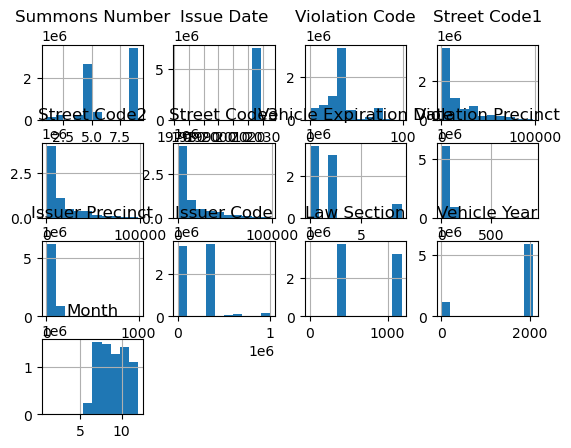

In [21]:
#Frequency distribution of df2 dataset

df2.hist()

In [22]:
#Which County/Borough has the most violations

df2.groupby(['Violation County'])['Violation Description'].count().sort_values(ascending=False).reset_index()

,Violation County,Violation Description
0,Queens,2044577
1,Brooklyn,1857113
2,Manhattan,1713819
3,Bronx,910475
4,Staten Island,287206
5,N,0


,Violation County,Summons Number
0,Queens,2085269
1,Brooklyn,1893673
2,Manhattan,1740927
3,Bronx,935037
4,Staten Island,290383
5,N,1


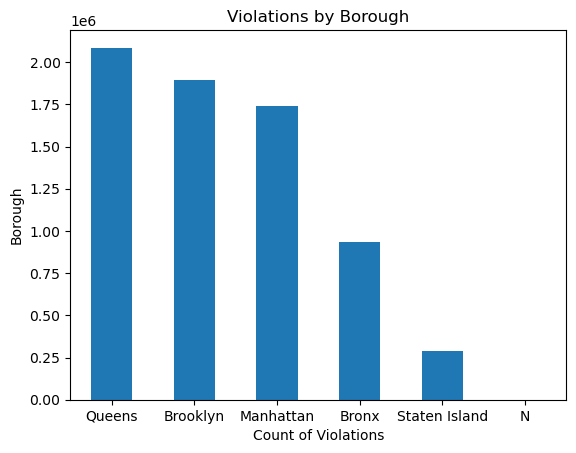

In [23]:
#Visualization by Borough


df2.groupby(['Violation County'])['Summons Number'].count().sort_values(ascending=False).plot(kind='bar')

plt.xticks(rotation=0) #for lettering
plt.title('Violations by Borough')
plt.ylabel("Borough")
plt.xlabel("Count of Violations")

#List of Borough
df2.groupby(['Violation County'])['Summons Number'].count().sort_values(ascending=False).reset_index()

In [24]:
#Which state has the most violations

df2.groupby(['Registration State'])['Summons Number'].count().sort_values(ascending=False).reset_index().head()

,Registration State,Summons Number
0,NY,5145725
1,NJ,671076
2,PA,255399
3,FL,168102
4,CT,125901


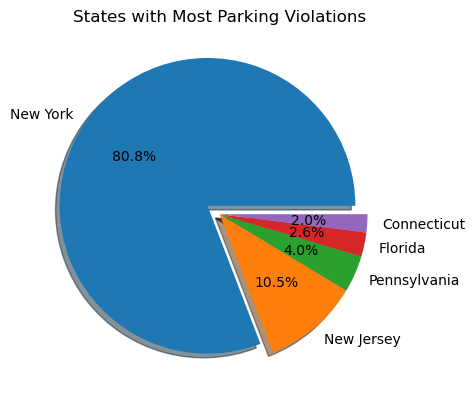

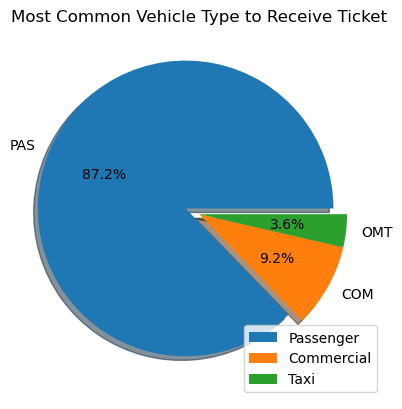

In [25]:

#Top 5 States with Parking Violations


df2['Registration State'].value_counts()

values=[5145725, 671076, 255399, 168102, 125901  ]
labels=['New York', 'New Jersey', 'Pennsylvania', 'Florida', 'Connecticut']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(values, labels=labels, autopct="%1.1f%%", explode=(0.1, 0, 0, 0, 0), shadow=True)

plt.title('States with Most Parking Violations')

plt.show()


#Vehicle Type with most violations PAS - Passenger; COM - Commerical; OMT - Taxi


df2['Plate Type'].value_counts()

values=[5814790, 610977, 239050]
labels=['PAS', 'COM', 'OMT']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(values, labels=labels, autopct="%1.1f%%", explode=(0.1, 0, 0 ), shadow=True)

plt.title('Most Common Vehicle Type to Receive Ticket')

plt.legend(["Passenger", "Commercial", "Taxi"])


In [26]:
#What are the top Violation Descriptions by Violation County

df2.groupby(['Violation County','Violation Code','Violation Description']) ['Summons Number'].count().sort_values(ascending=False).reset_index()


,Violation County,Violation Code,Violation Description,Summons Number
0,Queens,36,PHTO SCHOOL ZN SPEED VIOLATION,1093721
1,Brooklyn,36,PHTO SCHOOL ZN SPEED VIOLATION,766630
2,Bronx,36,PHTO SCHOOL ZN SPEED VIOLATION,387424
3,Brooklyn,21,21-No Parking (street clean),255681
4,Staten Island,36,PHTO SCHOOL ZN SPEED VIOLATION,201831
...,...,...,...,...
591,Bronx,47,47-Double PKG-Midtown(Com Veh),1
592,Manhattan,72,Mutilated Inspection Sticker (NYS Only),1
593,Brooklyn,1,01-No Intercity Pmt Displ,1
594,Brooklyn,42,42-Exp Meter (Com Zone),1


Text(0.5, 0, 'Violation Code Number')

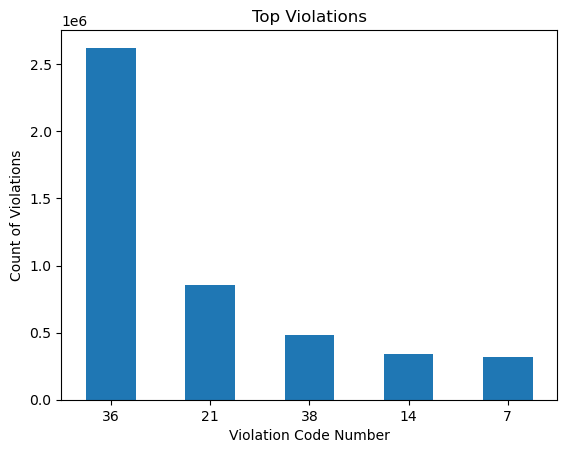

In [27]:
#Count of Violation by Description


df2['Violation Code'].value_counts().sort_values(ascending=True).nlargest().plot.bar()

plt.xticks(rotation=0)
plt.title('Top Violations')
plt.ylabel("Count of Violations")
plt.xlabel("Violation Code Number")


,Violation County,Violation Code,Violation Description,Summons Number
0,Queens,36,PHTO SCHOOL ZN SPEED VIOLATION,1093721
1,Brooklyn,36,PHTO SCHOOL ZN SPEED VIOLATION,766630
2,Bronx,36,PHTO SCHOOL ZN SPEED VIOLATION,387424
3,Brooklyn,21,21-No Parking (street clean),255681
4,Staten Island,36,PHTO SCHOOL ZN SPEED VIOLATION,201831
...,...,...,...,...
591,Bronx,47,47-Double PKG-Midtown(Com Veh),1
592,Manhattan,72,Mutilated Inspection Sticker (NYS Only),1
593,Brooklyn,1,01-No Intercity Pmt Displ,1
594,Brooklyn,42,42-Exp Meter (Com Zone),1


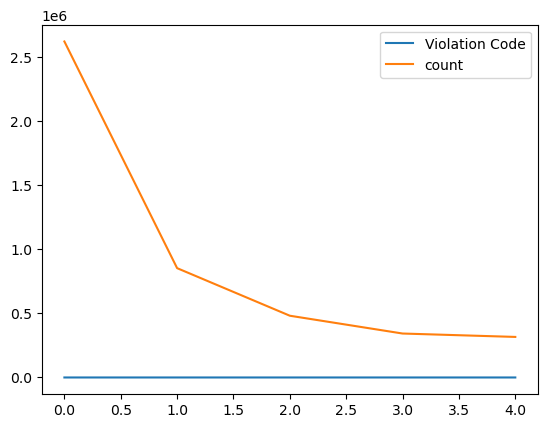

In [28]:
#Count of Violations by Description

df2['Violation Code'].value_counts().nlargest().reset_index().plot(kind='line')

#Count of Violations by Borough

df2.groupby(['Violation County','Violation Code','Violation Description']) ['Summons Number'].count().sort_values(ascending=False).reset_index()


In [29]:
#Violations by code and description

df2.groupby(['Violation County','Violation Code','Violation Description']) ['Summons Number'].count().sort_values(ascending=False).reset_index()


,Violation County,Violation Code,Violation Description,Summons Number
0,Queens,36,PHTO SCHOOL ZN SPEED VIOLATION,1093721
1,Brooklyn,36,PHTO SCHOOL ZN SPEED VIOLATION,766630
2,Bronx,36,PHTO SCHOOL ZN SPEED VIOLATION,387424
3,Brooklyn,21,21-No Parking (street clean),255681
4,Staten Island,36,PHTO SCHOOL ZN SPEED VIOLATION,201831
...,...,...,...,...
591,Bronx,47,47-Double PKG-Midtown(Com Veh),1
592,Manhattan,72,Mutilated Inspection Sticker (NYS Only),1
593,Brooklyn,1,01-No Intercity Pmt Displ,1
594,Brooklyn,42,42-Exp Meter (Com Zone),1


C:\Users\eliss\anaconda3\Lib\site-packages\seaborn\distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


<Axes: xlabel='Issue Date', ylabel='Count'>

C:\Users\eliss\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\eliss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


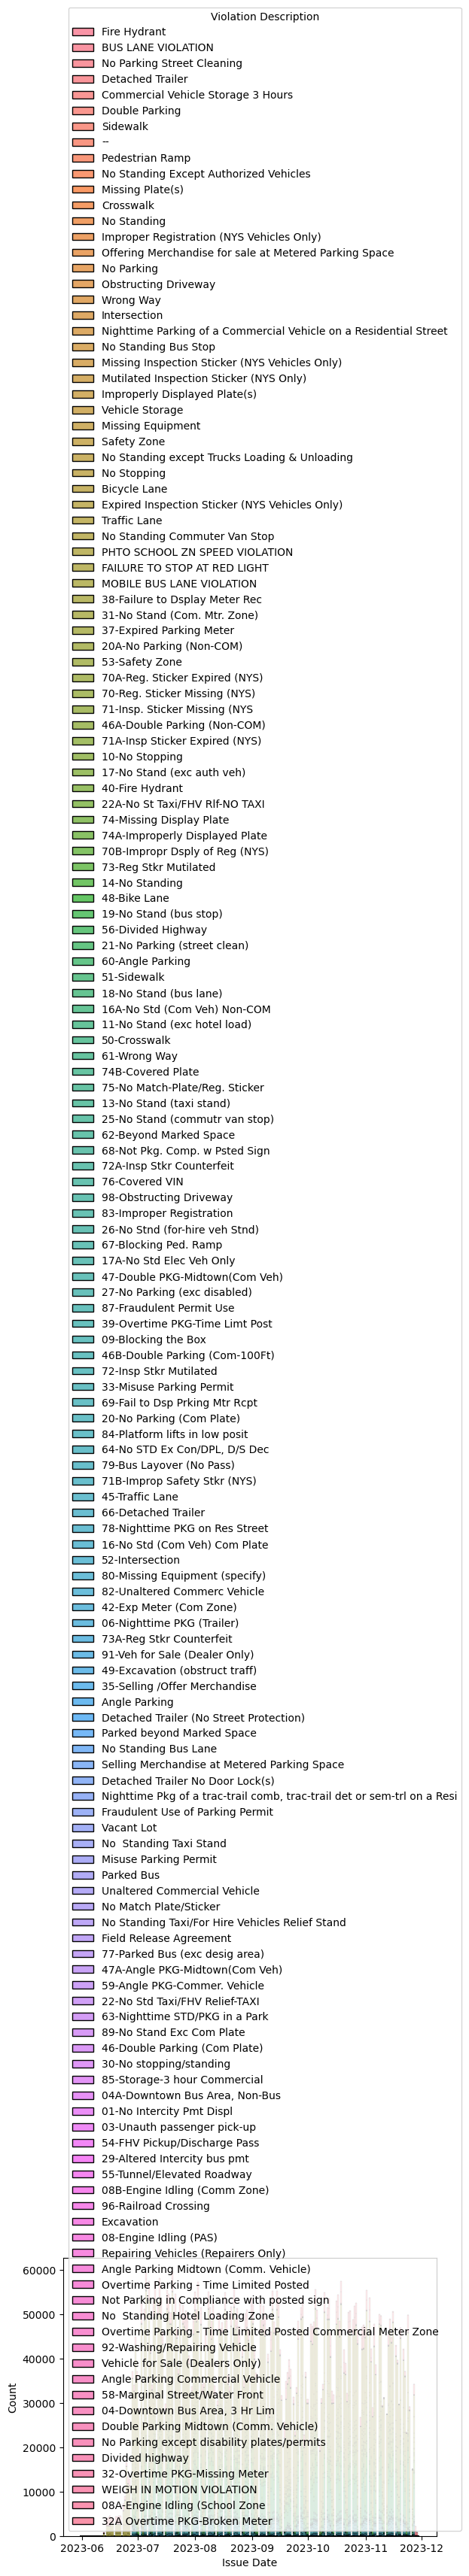

In [30]:
sns.histplot(data=df2, x="Issue Date", hue="Violation Description", multiple="stack")



C:\Users\eliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


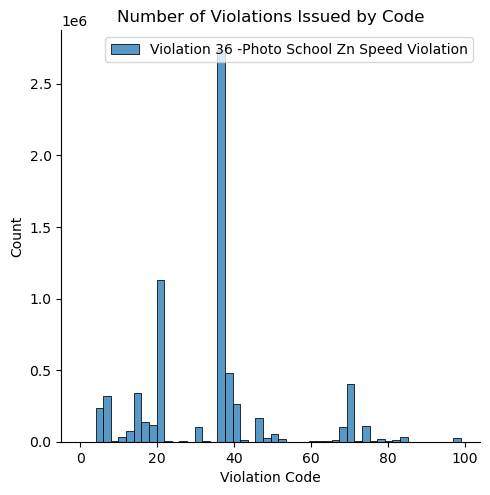

In [31]:
#Displot of violations

df2.groupby(['Violation County','Violation Code', 'Violation Description']) ['Summons Number'].count().sort_values(ascending=False)

sns.displot(df2['Violation Code'], bins=50)
plt.title('Number of Violations Issued by Code')
plt.legend(['Violation 36 -Photo School Zn Speed Violation']) 

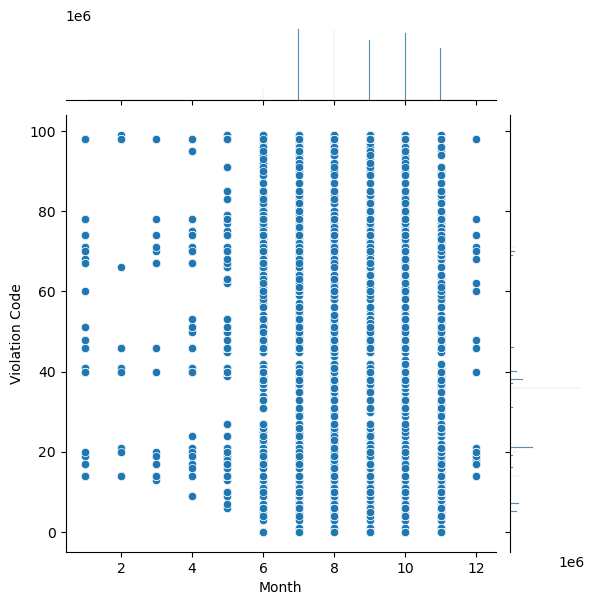

In [32]:
#Parking Violations by Month and Violation Code
#Number of issued violations increased in May 

sns.jointplot(data=df2, y="Violation Code", x="Month" )

In [33]:
#sns.jointplot(data=df2, x="Violation Code", y="Issuer Precinct", hue="Violation Description")

#sns.histplot(data=df2, x="Violation Code", hue="Issuer Precinct", multiple="stack")

In [34]:
#Create dictionary for violation codes and violation description

violation_codes ={
    1: "FAILURE TO DISPLAY BUS PERMIT",
    2: "NO OPERATOR NAM/ADD/PH DISPLAY",
    3: "UNAUTHORIZED PASSENGER PICK-UP",
    4: "BUS PARKING IN LOWER MANHATTAN",
    5: "BUS LANE VIOLATION",
    6: "OVERNIGHT TRACTOR TRAILER PKG",
    7: "FAILURE TO STOP AT RED LIGHT",
    8: "IDLING",
    9: "OBSTRUCTING TRAFFIC/INTERSECT",
    10: "NO STOPPING-DAY/TIME LIMITS",
    11: "NO STANDING-HOTEL LOADING",
    12: "MOBILE BUS LANE VIOLATION",
    13: "NO STANDING-TAXI STAND",
    14: "NO STANDING-DAY/TIME LIMITS",
    15: "NO STANDING-OFF-STREET LOT",
    16: "NO STANDING-EXC. TRUCK LOADING",
    17: "NO STANDING-EXC. AUTH. VEHICLE",
    18: "NO STANDING-BUS LANE",
    19: "NO STANDING-BUS STOP",
    20: "NO PARKING-DAY/TIME LIMITS",
    21: "NO PARKING-STREET CLEANING",
    22: "NO STAND TAXI/FHV RELIEF STAND",
    23: "NO PARKING-TAXI STAND",
    24: "NO PARKING-EXC. AUTH. VEHICLE",
    25: "NO STANDING-COMMUTER VAN STOP",
    26: "NO STANDING-FOR HIRE VEH STND",
    27: "NO PARKING-EXC. DSBLTY PERMIT",
    28: "OVERTIME STANDING DP",
    29: "ALTERING INTERCITY BUS PERMIT",
    30: "NO STOP/STANDNG EXCEPT PAS P/U",
    31: "NO STANDING-COMM METER ZONE",
    32: "OT PARKING-MISSING/BROKEN METR",
    33: "MISUSE PARKING PERMIT",
    34: "EXPIRED METER",
    35: "SELLING/OFFERING MCHNDSE-METER",
    36: "PHTO SCHOOL ZN SPEED VIOLATION",
    37: "EXPIRED MUNI METER",
    38: "FAIL TO DSPLY MUNI METER RECPT",
    39: "OVERTIME PKG-TIME LIMIT POSTED",
    40: "FIRE HYDRANT",
    41: "MISCELLANEOUS",
    42: "EXPIRED MUNI MTR-COMM MTR ZN",
    43: "EXPIRED METER-COMM METER ZONE",
    44: "PKG IN EXC. OF LIM-COMM MTR ZN",
    45: "TRAFFIC LANE",
    46: "DOUBLE PARKING",
    47: "DOUBLE PARKING-MIDTOWN COMML",
    48: "BIKE LANE",
    49: "EXCAVATION-VEHICLE OBSTR TRAFF",
    50: "CROSSWALK",
    51: "SIDEWALK",
    52: "INTERSECTION",
    53: "SAFETY ZONE",
    54: "PCKP DSCHRGE IN PRHBTD ZONE",
    55: "ELEVATED/DIVIDED HIGHWAY/TUNNL",
    56: "DIVIDED HIGHWAY",
    57: "BLUE ZONE",
    58: "MARGINAL STREET/WATER FRONT",
    59: "ANGLE PARKING-COMM VEHICLE",
    60: "ANGLE PARKING",
    61: "WRONG WAY",
    62: "BEYOND MARKED SPACE",
    63: "NIGHTTIME STD/ PKG IN A PARK",
    64: "NO STANDING EXCP D/S",
    65: "OVERTIME STDG D/S",
    66: "DETACHED TRAILER",
    67: "PEDESTRIAN RAMP",
    68: "NON-COMPLIANCE W/ POSTED SIGN",
    69: "FAIL TO DISP. MUNI METER RECPT",
    70: "REG. STICKER-EXPIRED/MISSING",
    71: "INSP. STICKER-EXPIRED/MISSING",
    72: "INSP STICKER-MUTILATED/C'FEIT",
    73: "REG STICKER-MUTILATED/C'FEIT",
    74: "FRONT OR BACK PLATE MISSING",
    75: "NO MATCH-PLATE/STICKER",
    76: "VIN OBSCURED",
    77: "PARKED BUS-EXC. DESIG. AREA",
    78: "NGHT PKG ON RESID STR-COMM VEH",
    79: "UNAUTHORIZED BUS LAYOVER",
    80: "MISSING EQUIPMENT",
    81: "NO STANDING EXCP DP",
    82: "COMML PLATES-UNALTERED VEHICLE",
    83: "IMPROPER REGISTRATION",
    84: "PLTFRM LFTS LWRD POS COMM VEH",
    85: "STORAGE-3HR COMMERCIAL",
    86: "MIDTOWN PKG OR STD-3HR LIMIT",
    87: "FRAUDULENT USE PARKING PERMIT",
    88: "UNALTERED COMM VEH-NME/ADDRESS",
    89: "NO STD(EXC TRKS/GMTDST NO-TRK)",
    90: "VEH-SALE/WSHNG/RPRNG/DRIVEWAY",
    91: "VEHICLE FOR SALE(DEALERS ONLY)",
    92: "WASH/REPAIR VEHCL-REPAIR ONLY",
    93: "REMOVE/REPLACE FLAT TIRE",
    96: "RAILROAD CROSSING",
    97: "VACANT LOT",
    98: "OBSTRUCTING DRIVEWAY",
    99: "OTHER"

}

df2.loc[:,"Violation Code"] = df2["Violation Code"].map(violation_codes)



In [35]:
#Mode of df2 dataset

df2.mode()

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,...,Issuer Code,Violation Time,Violation County,Street Name,Law Section,Sub Division,Days Parking In Effect,Vehicle Year,Violation Description,Month
0,1001716267,NY,PAS,2023-07-20,PHTO SCHOOL ZN SPEED VIOLATION,SUBN,HONDA,T,0.0,0.0,...,0.0,0836A,Queens,WB N CONDUIT AVE @ 8,408.0,B,YYYYYYY,0.0,PHTO SCHOOL ZN SPEED VIOLATION,7.0
1,1001716358,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1038843613,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1044537279,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1044537280,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008532,9096605536,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7008533,9096605548,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7008534,9096605550,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7008535,9096605561,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Street Name with most violations

df2.groupby(['Street Name','Violation County'])['Summons Number'].count().sort_values(ascending=False).reset_index()

,Street Name,Violation County,Summons Number
0,WB N CONDUIT AVE @ 8,Queens,153749
1,Broadway,Manhattan,56983
2,3rd Ave,Manhattan,42527
3,WB N CONDUIT AVE @ S,Queens,42447
4,Madison Ave,Manhattan,32133
...,...,...,...
37864,LAKEVIEW BLVD E,Queens,1
37865,LAKEVIEW,Queens,1
37866,LAKE PLACE,Brooklyn,1
37867,LAKE COURT,Staten Island,1


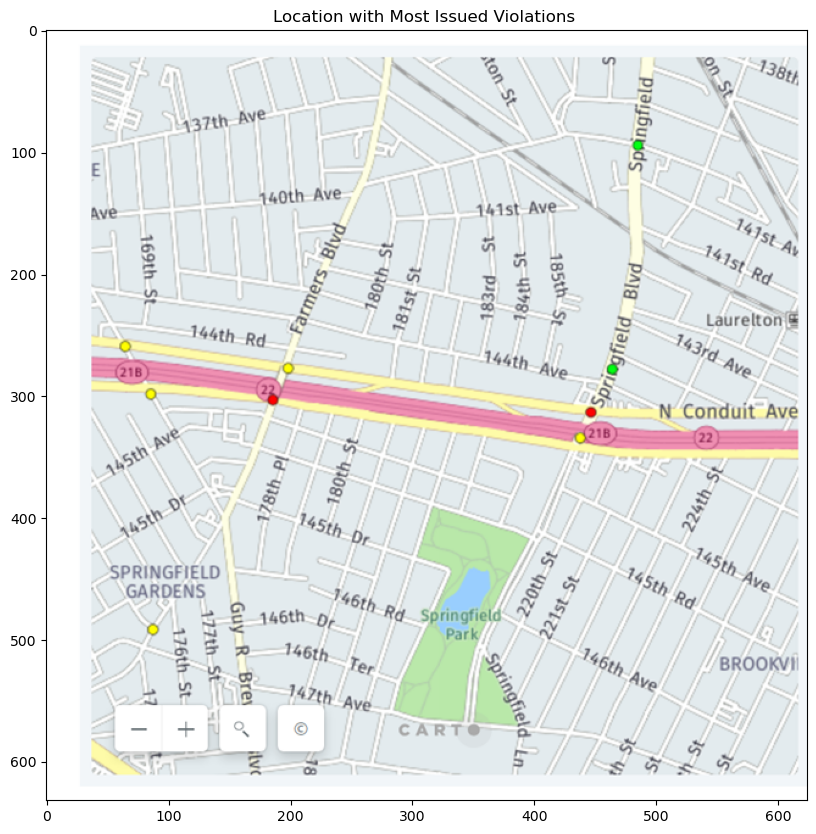

In [37]:
#Conduit Map
#Circles represent speed camera locations


im = Image.open
im = Image.open("C:\\Users\\eliss\\OneDrive\\Pictures\\CONDUIT.png")

plt.figure(figsize=(10,10))
y_start = im.height

y_end = 0 

x = 200

line = ((x,y_start), (x,y_end))

plt.title('Location with Most Issued Violations ')

plt.imshow(im)


In [38]:
#New dataframe 

df3=df2[['Violation County', 'Violation Description','Issue Date', 'Issuer Precinct', 'Violation Time', 'Street Name', 'Street Code1', 'Street Code2' ]]

df3

,Violation County,Violation Description,Issue Date,Issuer Precinct,Violation Time,Street Name,Street Code1,Street Code2
0,Bronx,NaN,2023-06-09,43,0911A,I/O TAYLOR AVE,0,0
1,Manhattan,NaN,2023-06-30,968,0717A,E 44TH ST,17870,25390
2,NaN,NaN,2023-06-30,968,0823A,E 44TH STREET,17870,25390
3,NaN,NaN,2023-07-06,968,1150P,60TH ST,12690,41700
4,Queens,NaN,2023-07-08,968,1150P,60TH ST,12690,41700
...,...,...,...,...,...,...,...,...
7008532,Brooklyn,21-No Parking (street clean),2023-11-27,79,1112A,Throop Ave,85330,72830
7008533,Brooklyn,21-No Parking (street clean),2023-11-27,79,1115A,Throop Ave,85330,47630
7008534,Brooklyn,21-No Parking (street clean),2023-11-27,79,1117A,Throop Ave,85330,93230
7008535,Brooklyn,71A-Insp Sticker Expired (NYS),2023-11-27,79,1118A,Throop Ave,85330,93230


In [39]:
##sns.histplot(data=df3, x="Issue Date", hue="Issuer Precinct", multiple="stack")

In [40]:
#df3[df3['Violation County'].str.contains('Queens')]

<Axes: >

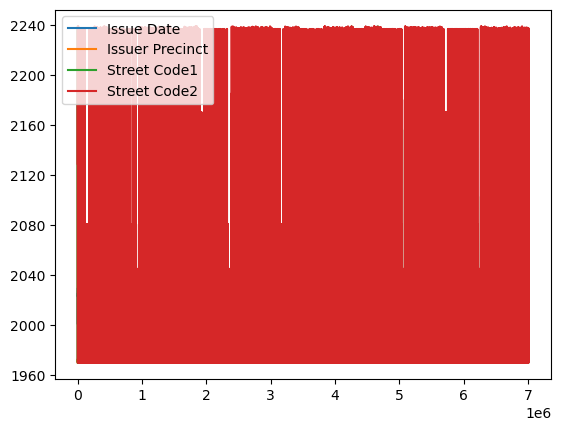

In [41]:
#Plot graph of df3 - not useful

df3.plot()

C:\Users\eliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


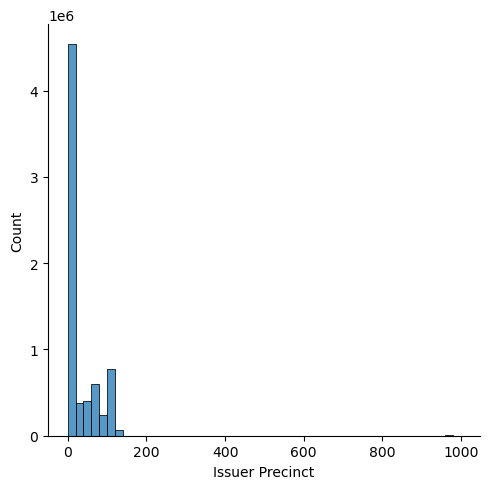

In [42]:
#Displot of violations issued by precinct - speed cameras lead all precincts

sns.displot(df3['Issuer Precinct'], bins=50)

C:\Users\eliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


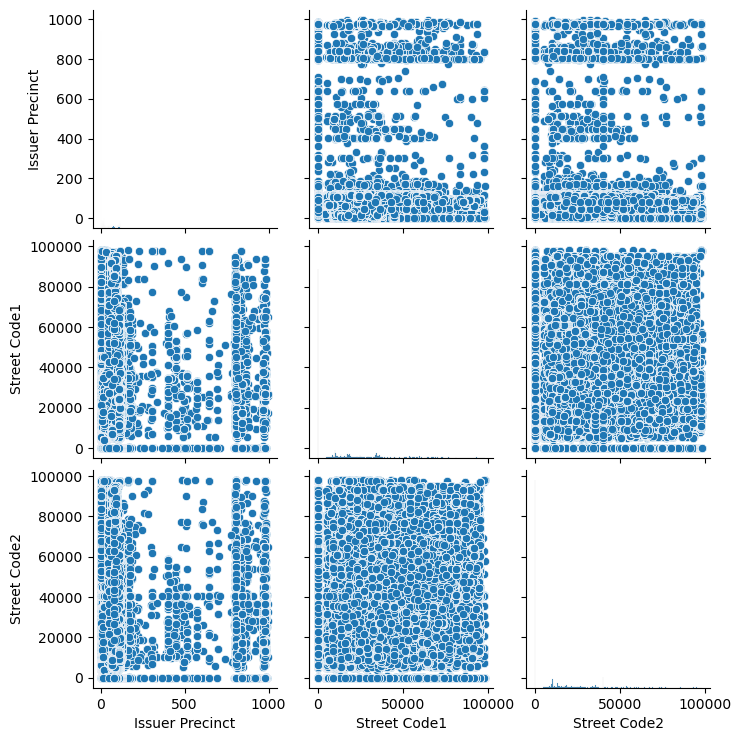

In [43]:
#Looking for other possible areas to focus on 

sns.pairplot(df3)

In [44]:
#New dataframe to look at Queens 

df3 = df3[df3["Street Name"].str.contains('CONDUIT AVE', na=False)]

df3

,Violation County,Violation Description,Issue Date,Issuer Precinct,Violation Time,Street Name,Street Code1,Street Code2
9668,Manhattan,NaN,2023-07-06,113,0952A,E/B S CONDUIT AVE,0,0
9669,Queens,NaN,2023-07-06,113,0950A,E/B S CONDUIT AVE,0,0
9671,Queens,NaN,2023-07-07,113,1107A,E/B/S CONDUIT AVE,0,0
34463,Queens,PHTO SCHOOL ZN SPEED VIOLATION,2023-06-22,0,0805P,WB N CONDUIT AVE @ S,0,0
34477,Queens,PHTO SCHOOL ZN SPEED VIOLATION,2023-06-22,0,0837P,EB S CONDUIT AVE @ 2,0,0
...,...,...,...,...,...,...,...,...
6265393,Queens,FAILURE TO STOP AT RED LIGHT,2023-11-15,0,0253P,WB N CONDUIT AVE @ V,0,0
6265411,Queens,FAILURE TO STOP AT RED LIGHT,2023-11-15,0,0356P,S CONDUIT AVE (E/B),0,0
6265424,Queens,FAILURE TO STOP AT RED LIGHT,2023-11-15,0,0449P,WB N CONDUIT AVE @ V,0,0
6265454,Queens,FAILURE TO STOP AT RED LIGHT,2023-11-15,0,0644P,S CONDUIT AVE (E/B),0,0


## Conclusion




After in depth analysis, it was determined that Queens, New York leads the five boroughs with the most parking violations issued to date in FY2024 at 29.7%. New York plates received 80.8% of the total issued parking violation followed by New Jersey at 10.5%. The most common vehicle type to receive a parking violation ticket are passenger vehicles at 87.2%; followed by commercial vehicles at 9.2% and closed out by taxis at 3.6%. 




Violation code 36 or Photo School Zn Speed Violation is the most frequently issued violation in four of the five boroughs – Queens, Brooklyn, Bronx, and Staten Island. The number of violations issued saw a steady increase beginning in May of 2023 through November of 2023. The data for December was not updated at the time of this analysis. 




In August 2022, Mayor Adams approved legislation to allow speed cameras to operate on a 24/7 basis capturing any drivers driving 10 mph or more over the speed limit. The city currently has 2,000 speed cameras in place throughout the five boroughs. These cameras previously operated only on weekdays, between 6:00 AM and 10:00 PM, missing 59% of traffic fatalities that occurred when the cameras were turned off. Research has shown that speed cameras are effective safety measures and reduce speeding by up to 72%.  Government officials have noted a 25% decrease in speeding across the city. 




While speed cameras have made driving safer, it is hard to deny residents in the Laurelton community of Queens are unproportionally impacted by their presence more than any other area in the city. The violations issued by the speed cameras typically range from $50 -$65 dollars and have raked in a hefty $100M for the city according to the comptroller.   It is important to note that Conduit is an arterial road connecting Nassau County to Brooklyn, where more than 9,000 drivers travel this corridor daily.  It is no wonder the city has several cameras in place on this stretch road. There were 153,749 parking violations issued for drivers traveling westbound on the N. Conduit in Laurelton, Queens. They must have been in a rush to get into Brooklyn - Drivers beware !


##### Unsuccessful Code

In [ ]:
#create a sample dictionary in oder to establish name consistency in dataset

# dates = {
    #"Issue Date": [','R','Rich','RICH','BX', 'BRONX', 'K', 'KINGS', 'BK', 'QN','Q','Qns','QNS','QUEEN', 'NY','MN' ]}

#violations = pd.DataFrame(violationsd)  

# Create a dictionary of values to replace
#replace_dict = {
    #"ST": "Staten Island",
    #"R": "Staten Island",
    #"Rich": "Staten Island",
    #"RICH": "Staten Island",
    #"BX": "Bronx",
    #"BRONX": "Bronx",
    #"BK": "Brooklyn",
    #"K": "Brooklyn",
    #"Kings": "Brooklyn",
   #"KINGS": "Brooklyn",
   #"MN": "Manhattan",
    #"NY": "Manhattan",
    #"QN":"Queens",
    #"QNS":"Queens",
    #"Qns":"Queens",
    #"QUEEN":"Queens",
   #"Q":"Queens"}

#replace values in borough column using dictionary

#df2['Violation County']=df2['Violation County'].replace(replace_dict)

#df2.head()

In [46]:
#df3.groupby(['Violation County','Violation Code','Violation Description']) ['Summons Number'].count().sort_values(ascending=False)

#sns.displot(df2['Violation Code'], bins=50)
#plt.title('Number of Violations Issued by Code')
#plt.legend(['Violation 36 -Photo School Zn Speed Violation']) 

In [ ]:
#sns.jointplot(x='Issuer Precinct', y='Violation Code', df2=data);

In [ ]:
#sns.pairplot(df2, hue='Violation Code')

In [ ]:
#df2.groupby(['Violation County','Violation Code','Violation Description']) ['Summons Number'].count().sort_values(ascending=False)

#sns.displot(tips['Violation Code'], bins=50)

In [ ]:
#df3 = df2rename[df2rename['Vehicle Make & Model'].str.contains('Merc')]

In [ ]:
#graph that shows violation description by borough
#x axis = county violation
#y=violation code

#top_violations = df3[df3['Summons Number'] > 200000].sort_values('Summons Number') 

#top_violations.plot(x = 'Violation County', y = [ 'Violation Code','Registration State'], kind='bar')